In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from sktime.datasets import load_from_tsfile
from collections import Counter
from preprocessing import (
    get_paths, 
    TargetEncoder,
    stretch_interpolate_matrix,
    sample_rows,
)
from reading import Reading
plt.rcParams["font.size"] = 10
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
reading = Reading()
X, y = reading.read_dataset()

Number of classes:

In [3]:
def histogram(data, figsize=(6, 4), x_log=False, bins=80, title=""):
    fig, ax = plt.subplots(figsize=figsize)
    if x_log:
        assert min(data) > 0
        plt.xscale("log" if x_log else "linear")
        ax.hist(data, bins=np.logspace(np.log10(min(data)), np.log10(max(data)), bins))
    else:
        ax.hist(data, bins=bins)
    if title:
        plt.title(title)
        fig.savefig(
            "../latex/2. thesis/imgs/" + title.lower().replace(" ", "_") + ".png",
            dpi=500,
            transparent=True
        )
    fig.tight_layout()
    plt.show()

In [4]:
len(np.unique(y.ravel()))

980

Distribution of lengths of the series.

In [5]:
lengths_of_datasets = [len(x) for x in X]

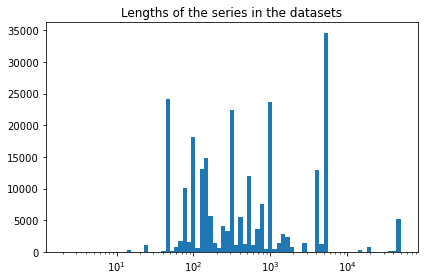

In [6]:
histogram(lengths_of_datasets, title="Lengths of the series in the datasets", x_log=True)

Number of observations per dataset:

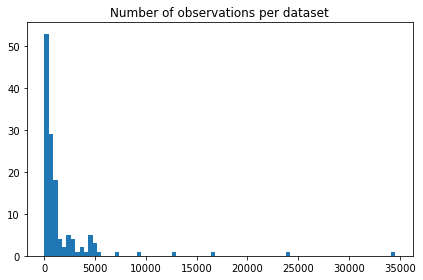

In [7]:
rows_per_dataset = [sum(np.char.startswith(y.ravel(), dataset)) for dataset in reading.categories.keys()]
histogram(rows_per_dataset, title="Number of observations per dataset")

Number of observations per class:

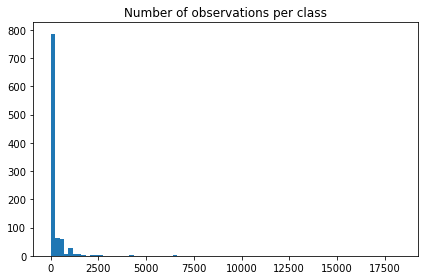

In [8]:
rows_per_class = Counter(y.ravel()).values()
histogram(rows_per_class, title="Number of observations per class")

Number of classes per dataset:

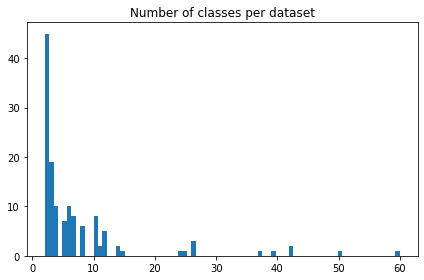

In [9]:
classes_per_dataset = [
    len(np.unique(y[np.char.startswith(y, dataset)])) for dataset in reading.categories.keys()
]
histogram(classes_per_dataset, title="Number of classes per dataset")

# Sample series

In [10]:
def plot(dataset_name):
    X, y = Reading().read_dataset(dataset=dataset_name)
    X, y = sample_rows(X, y, n=30)
    X = stretch_interpolate_matrix(X, 100)
    color = TargetEncoder(y).get_0_1_scaled()
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.tight_layout()
    for i in range(len(X)):
        ax.plot(X[i], c=plt.cm.rainbow(color[i]), label=y[i])
    handles, labels = ax.get_legend_handles_labels()
    unique = [
        (h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]
    ]
    try:
        unique = [(h, int(l)) for h, l in unique]
    except:
        pass
    unique = sorted(unique, key=lambda x: x[1])
    ax.legend(*zip(*unique))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(dataset_name)
    fig.savefig(f"../latex/2. thesis/imgs/UCR_{dataset_name}.png", transparent=True)

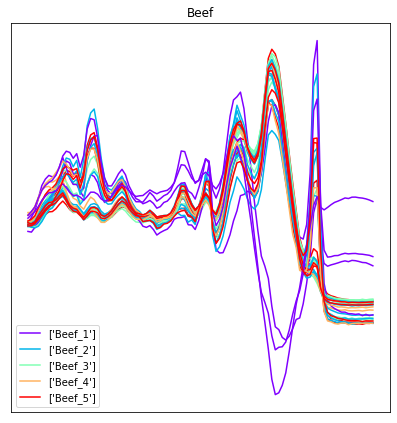

In [11]:
dataset_name = "Beef"
plot(dataset_name)

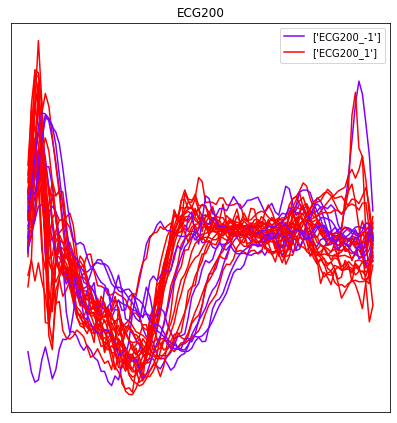

In [12]:
dataset_name = "ECG200"
plot(dataset_name)

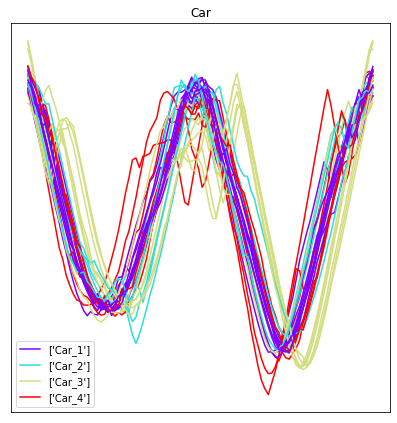

In [13]:
dataset_name = "Car"
plot(dataset_name)

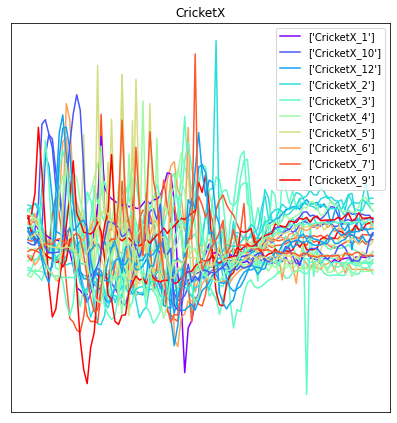

In [14]:
dataset_name = "CricketX"
plot(dataset_name)

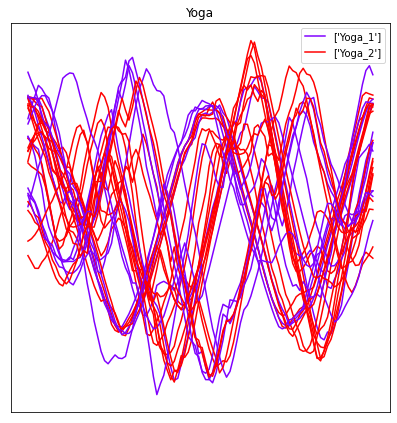

In [15]:
dataset_name = "Yoga"
plot(dataset_name)

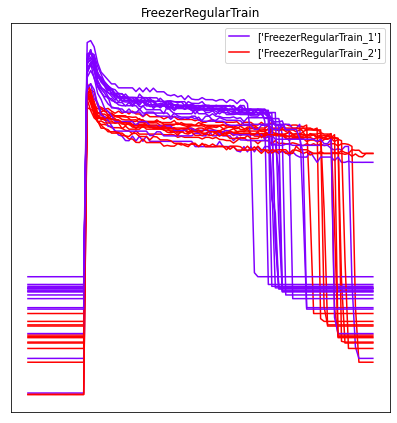

In [16]:
dataset_name = "FreezerRegularTrain"
plot(dataset_name)

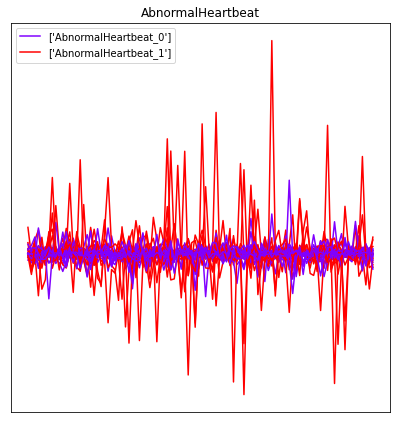

In [17]:
dataset_name = "AbnormalHeartbeat"
plot(dataset_name)

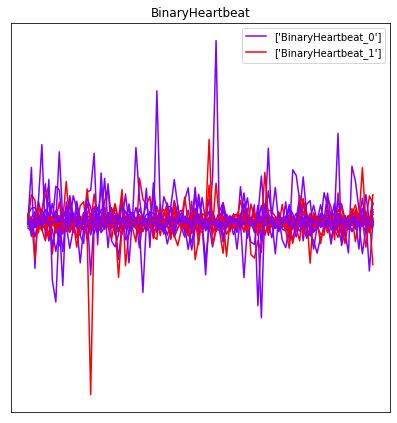

In [18]:
dataset_name = "BinaryHeartbeat"
plot(dataset_name)

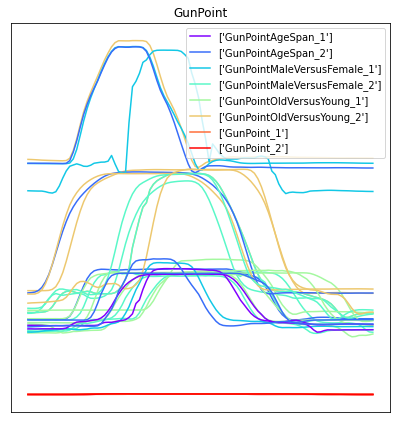

In [19]:
dataset_name = "GunPoint"
plot(dataset_name)